In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [379]:
CKDdata = pd.read_excel (r'/Users/shubpuri/Downloads/health care/Chronic Kidney Disease Dataset.xls' ,'All Data')

#pd.read_excel()
df=CKDdata

df5=CKDdata
target= df.CKD

df=df.drop('ID', axis=1)
df.head()

,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,Height,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,65,1,white,0.0,0.0,1.0,other,1.0,56.0,162.1,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,162.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,162.5,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,160.5,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,159.2,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
df.dtypes

Age                   int64
Female                int64
Racegrp              object
Educ                float64
Unmarried           float64
Income              float64
CareSource           object
Insured             float64
Weight              float64
Height              float64
BMI                 float64
Obese               float64
Waist               float64
SBP                 float64
DBP                 float64
HDL                 float64
LDL                 float64
Total Chol          float64
Dyslipidemia          int64
PVD                   int64
Activity            float64
PoorVision          float64
Smoker                int64
Hypertension        float64
Fam Hypertension      int64
Diabetes            float64
Fam Diabetes          int64
Stroke              float64
CVD                 float64
Fam CVD             float64
CHF                 float64
Anemia              float64
CKD                 float64
dtype: object

In [381]:
df.isna().sum().sort_values(ascending=False)


CKD                 2819
Income              1166
PoorVision           567
Unmarried            452
Fam CVD              419
DBP                  380
Waist                314
SBP                  308
BMI                  290
Obese                290
Weight               194
Height               191
Insured              113
Hypertension          80
CHF                   36
CVD                   23
Educ                  20
LDL                   18
HDL                   17
Total Chol            16
Stroke                11
Activity              10
Anemia                 6
Diabetes               2
Dyslipidemia           0
PVD                    0
Smoker                 0
Fam Hypertension       0
CareSource             0
Fam Diabetes           0
Racegrp                0
Female                 0
Age                    0
dtype: int64

In [382]:
#transform Racegrp from Categories black,Hispa, Other, White into 0,1,2,3 respectively
from sklearn.preprocessing import LabelEncoder
# 0 - Black | 1- Hispa | 2- Other | 3- White
lb_make = LabelEncoder()
df["Racegrp"] = lb_make.fit_transform(df["Racegrp"])
print(df['Racegrp'].value_counts())


3    4340
1    2593
0    1606
2     280
Name: Racegrp, dtype: int64


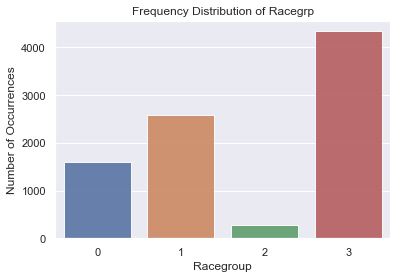

In [383]:
#PLOTTING RACEGRP
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
racegrp_count = df['Racegrp'].value_counts()
sns.set(style="darkgrid")
sns.barplot(racegrp_count.index, racegrp_count.values, alpha=0.9)
plt.title('Frequency Distribution of Racegrp')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Racegroup', fontsize=12)
plt.show()

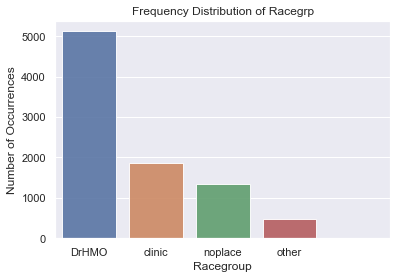

In [384]:
#PLOTTING CareSource
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
racegrp_count = df['CareSource'].value_counts()
sns.set(style="darkgrid")
sns.barplot(racegrp_count.index, racegrp_count.values, alpha=0.9)
plt.title('Frequency Distribution of Racegrp')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Racegroup', fontsize=12)
plt.show()

In [385]:
#Change Categories of Caresource from DrHMO, clinic, noplace, other to 1,2,3,4
# 1- DrHMO | 2-clinic | 3- noplace | 4- other 
import numpy as np
df['CareSource'] = np.where(df['CareSource']=='DrHMO', 0,np.where(df['CareSource']=='clinic', 1,
                                                                    np.where(df['CareSource']=='noplace', 2, 3)) )
print(df['CareSource'].value_counts())


0    5123
1    1873
2    1353
3     470
Name: CareSource, dtype: int64


In [386]:
#Transform Numeric variables(Float and int) into Categorical variables
col_names=['Female','Racegrp','Educ', 'Unmarried', 'Income','CareSource', 'Insured', 'Obese', 'Dyslipidemia', 'PVD', 'Activity', 'PoorVision', 'Smoker', 'Hypertension', 
    'Fam Hypertension', 'Diabetes', 'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia' , 'CKD']
for col in col_names:
    df[col] = df[col].astype('category',copy=False)


In [387]:
df.dtypes

Age                    int64
Female              category
Racegrp             category
Educ                category
Unmarried           category
Income              category
CareSource          category
Insured             category
Weight               float64
Height               float64
BMI                  float64
Obese               category
Waist                float64
SBP                  float64
DBP                  float64
HDL                  float64
LDL                  float64
Total Chol           float64
Dyslipidemia        category
PVD                 category
Activity            category
PoorVision          category
Smoker              category
Hypertension        category
Fam Hypertension    category
Diabetes            category
Fam Diabetes        category
Stroke              category
CVD                 category
Fam CVD             category
CHF                 category
Anemia              category
CKD                 category
dtype: object

In [388]:
#Divide the dataset into categorical and Numerical variables
df_num=df.select_dtypes(exclude=['category'])
df_cat=df.select_dtypes(include=['category'])

In [393]:
df_num.isna().sum().sort_values(ascending=False)


Total Chol    0
LDL           0
HDL           0
DBP           0
SBP           0
Waist         0
BMI           0
Height        0
Weight        0
Age           0
dtype: int64

In [392]:
#Treat NA values by removing the rows with NA in all the variables
df_num=df_num.dropna(subset=['Total Chol', 'HDL','Height','BMI','DBP','Waist','SBP', 'Weight','LDL'])

In [395]:
df_cat.dtypes

Female              category
Racegrp             category
Educ                category
Unmarried           category
Income              category
CareSource          category
Insured             category
Obese               category
Dyslipidemia        category
PVD                 category
Activity            category
PoorVision          category
Smoker              category
Hypertension        category
Fam Hypertension    category
Diabetes            category
Fam Diabetes        category
Stroke              category
CVD                 category
Fam CVD             category
CHF                 category
Anemia              category
CKD                 category
dtype: object

In [264]:
#T test for Numerical data
from scipy import stats
from scipy.stats import ttest_ind
ttest_ind(df2['Age'], CKDdata['CKD'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [227]:
stats.ttest_rel(df2_num['Age'], df2_num['CKD'])

ValueError: unequal length arrays

# Univariate and Bi-variate Analysis with the Dependent variable 

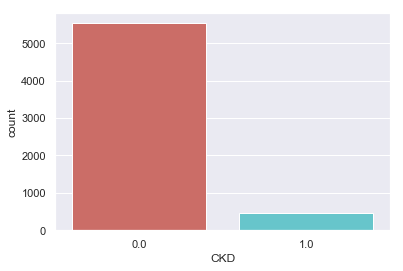

In [193]:
#NUMBER OF PEOPLE WHO DO NOT HAVE CKD vs WHO HAVE CKD
sb.countplot(x='CKD',data=df, palette='hls')

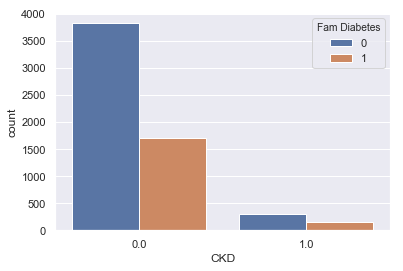

In [194]:
sns.countplot(x='CKD', hue= 'Fam Diabetes', data= CKDdata)

## Chi square test for all Categorical Variables along Dependent variable CKD

In [396]:
#Now we check Categorical variables that are statistically significant( p-value < 5% )
from scipy.stats import chisquare
import scipy.stats as stats
import numpy as np
for series in df_cat:
    nl = "\n"
    crosstab = pd.crosstab(df_cat[f"{series}"], df_cat['CKD'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
 

CKD      0.0  1.0
Female           
0       2655  210
1       2881  254 

Chi2 value= 1.1452169614967214
p-value= 0.2845526500711544
Degrees of freedom= 1

CKD       0.0  1.0
Racegrp           
0        1001   77
1        1688   70
2         184    6
3        2663  311 

Chi2 value= 71.7035803144218
p-value= 1.8425138264614048e-15
Degrees of freedom= 3

CKD    0.0  1.0
Educ           
0.0   3064  308
1.0   2458  155 

Chi2 value= 20.703306775708185
p-value= 5.36233176500185e-06
Degrees of freedom= 1

CKD         0.0  1.0
Unmarried           
0.0        3335  227
1.0        1926  211 

Chi2 value= 22.581822954684363
p-value= 2.0138093673934293e-06
Degrees of freedom= 1

CKD      0.0  1.0
Income           
0.0     2723  293
1.0     2088  104 

Chi2 value= 43.83050271484093
p-value= 3.5808059020643676e-11
Degrees of freedom= 1

CKD          0.0  1.0
CareSource           
0           3156  326
1           1169  100
2            911   14
3            300   24 

Chi2 value= 63.18963485004890

In [397]:
#Dropping Non-Significant Categorical variables based on the Chi-square test
drop_cat= ['Female', 'Obese', 'Dyslipidemia', 'Fam Diabetes']
df= df.drop(drop_cat, axis=1)

In [ ]:
#Bi-variate Analysis with the Dependent variable 


# For Numerical variables, check correlations between independent variables

Age           1.000000
Total Chol    0.155717
HDL           0.026316
BMI           0.018645
DBP           0.018549
Height       -0.121489
Name: Age, dtype: float64

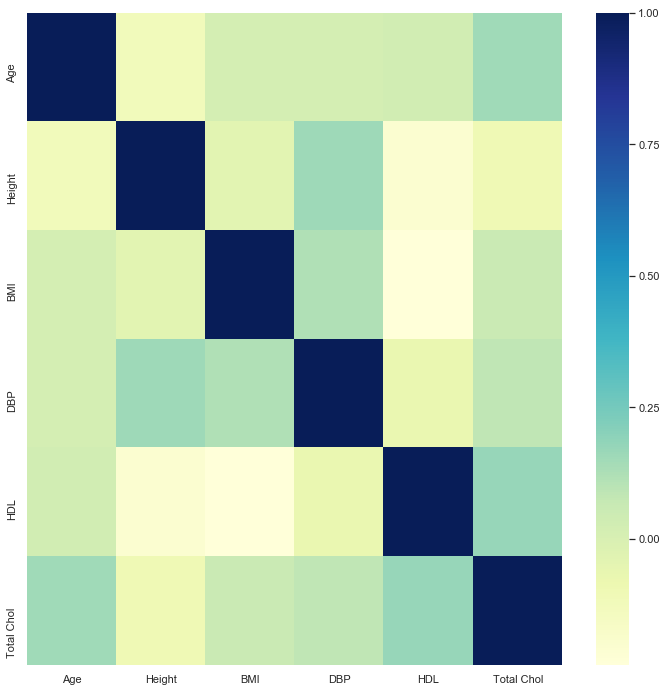

In [400]:
#Check for correlations using heatmap
correlations= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlations, cmap="YlGnBu")

#Check the correlation values with the independent variables
correlations= df.corr()
correlations['Age'].sort_values(ascending=False)

In [399]:

#BMI is highly correlated with Weight and Waist so we'll remove them
BMIcorr=['Weight', 'Waist']
df= df.drop(BMIcorr, axis=1)

#Total Chol is highly correlated with LDL
df= df.drop('LDL', axis=1)

#Age is highly correlated with SBP
df= df.drop('SBP', axis=1)


In [408]:
df2.isna().sum().sort_values(ascending=False)

CKD                 1925
Total Chol             0
Racegrp                0
Educ                   0
Unmarried              0
Income                 0
CareSource             0
Insured                0
Height                 0
BMI                    0
DBP                    0
HDL                    0
PVD                    0
Anemia                 0
Activity               0
PoorVision             0
Smoker                 0
Hypertension           0
Fam Hypertension       0
Diabetes               0
Stroke                 0
CVD                    0
Fam CVD                0
CHF                    0
Age                    0
dtype: int64

In [407]:
#Create a copy of dataset df
df2= df.copy()

In [405]:
#Treat NA values by removing the rows with NA in all the variables
df2=df.dropna(subset=['Diabetes', 'Anemia', 'Activity', 'Stroke','Total Chol', 'HDL', 'Educ', 'CVD', 'CHF', 
                 'Hypertension','Insured','Height','BMI','DBP','Fam CVD','Unmarried','PoorVision','Income'])

In [409]:
y= df2.CKD
y.shape

(6091,)

In [94]:
#Split into CKD is not Null into Train data and CKD= NULL into test data


X_train= df2[:4166]
X_test=df2[4166:]

y_test1=df2[]

y_train=df2.CKD[:4166]
y_test=df2.CKD[4166:]

X_train=X_train.drop('CKD', axis=1)
X_test= X_test.drop('CKD', axis=1)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4166, 24) (4166,)
(1925, 24) (1925,)


CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [96]:
#Now Training data has NO NULL VALUES while the Test data has 1925 Null Values in CKD which we have to predict
X_test.isna().sum().sort_values(ascending=False)

1925

In [344]:
X

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,26,0,white,1.0,0.0,0.0,DrHMO,1.0,119.3,...,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,66,0,black,1.0,0.0,0.0,DrHMO,0.0,85.1,...,1.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0
7,8,59,1,white,1.0,1.0,0.0,DrHMO,1.0,69.9,...,0.0,1,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0
8,9,53,1,white,1.0,0.0,1.0,DrHMO,1.0,75.2,...,1.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0
9,10,78,1,black,0.0,1.0,0.0,DrHMO,1.0,47.6,...,1.0,0,1.0,1,1.0,1.0,1.0,NaN,0.0,0.0


In [347]:
Y=df5.iloc[:,-1]

In [336]:
Y1=Y[:4166]

In [338]:
Y1.tail(5)

4161    0.0
4162    0.0
4163    0.0
4164    0.0
4165    0.0
Name: CKD, dtype: category
Categories (2, float64): [0.0, 1.0]

In [339]:
Y2=Y[4166:]

In [340]:
Y2.tail(5)

8814   NaN
8815   NaN
8816   NaN
8817   NaN
8818   NaN
Name: CKD, dtype: category
Categories (2, float64): [0.0, 1.0]

In [366]:
df2.dtypes

Age                   int64
Female                int64
Racegrp              object
Educ                float64
Unmarried           float64
Income              float64
CareSource           object
Insured             float64
Weight              float64
Height              float64
BMI                 float64
Obese               float64
Waist               float64
SBP                 float64
DBP                 float64
HDL                 float64
LDL                 float64
Total Chol          float64
Dyslipidemia          int64
PVD                   int64
Activity            float64
PoorVision          float64
Smoker                int64
Hypertension        float64
Fam Hypertension      int64
Diabetes            float64
Fam Diabetes          int64
Stroke              float64
CVD                 float64
Fam CVD             float64
CHF                 float64
Anemia              float64
CKD                 float64
dtype: object

In [414]:
import statsmodels.api as sm
#model=sm.Logit(Y1,X2)
#result=model.fit()
#print(result.summary2())


Y= ['CKD']
Y= df2['CKD']
independentVar= [i for i in df2 if i not in Y]
X=df2[independentVar]
model1= sm.Logit(Y, X)
answer= model1.fit()






ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [417]:
X.dtypes

Age                    int64
Racegrp             category
Educ                category
Unmarried           category
Income              category
CareSource          category
Insured             category
Height               float64
BMI                  float64
DBP                  float64
HDL                  float64
Total Chol           float64
PVD                 category
Activity            category
PoorVision          category
Smoker              category
Hypertension        category
Fam Hypertension    category
Diabetes            category
Stroke              category
CVD                 category
Fam CVD             category
CHF                 category
Anemia              category
CKD                 category
dtype: object

## Cross Validation: 

In [98]:
#Dividing the Training dataset into further Train and Validate to check the accuracy
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
         X_train, y_train, test_size=0.20)

In [317]:
from sklearn.linear_model import LogisticRegression

#Fit the model on the new Train and validation set

#model = LogisticRegression()
#model = LogisticRegression.fit(X_train2,y)



model = sm.Logit(X_train2,sm.add_constant(y))
result = model.fit()
print(result.summary())





ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [316]:
pd.DataFrame(zip(X_train2.columns, np.transpose(logmodel.coef_)))

TypeError: data argument can't be an iterator

In [298]:
#Predicting:
pred=logmodel.predict(X_test2)

In [284]:
classification_report(y_test2,pred)

'              precision    recall  f1-score   support\n\n         0.0       0.95      0.99      0.97       783\n         1.0       0.50      0.14      0.22        51\n\n   micro avg       0.94      0.94      0.94       834\n   macro avg       0.72      0.56      0.59       834\nweighted avg       0.92      0.94      0.92       834\n'

In [311]:
print (LogReg.score(X_train2,y_train2))

0.9339735894357744


In [102]:
#Confusion matrix and accuracy-
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2,pred)


array([[776,   7],
       [ 44,   7]])

In [104]:
#Check for Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,pred)

0.9388489208633094

In [308]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train2,X_train2)
result=logit_model.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [163]:
predictfinal=logitmodel.predict(X_test)

#WE CANNOT MAKE A CONFUSION MATRIX OR FIND ACCURACY OF THE PREDICTIONS AS y_test CONTAINS NULL VALUES WHICH HAVE BEEN PREDICTED AS predictfinal array variable

In [175]:
import sklearn.linear_model as lm
logreg = lm.LogisticRegression()
logreg.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [236]:
logitmodel.coef_
logitmodel.intercept_

array([-3.07113057])

In [172]:
predictfinal

array([0., 0., 0., ..., 0., 0., 0.])